<a href="https://colab.research.google.com/github/SBShimm/Aiffel/blob/master/GoingDeeper/GoingDeeper_NLP6_SB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모든 장르 간 편향성 측정해보기.

## 1. 명사인 단어 추출

In [ ]:
import numpy as np
import os

In [ ]:
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 647 kB/s 
     |████████████████████████████████| 453 kB 73.5 MB/s 


형태소 분석기를 이용하여 명사만 tokenized에 담는다.

In [ ]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('/content/drive/MyDrive/Colab/Datasets/synopsis/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

명사만 뽑은 단어를 Word2Vec 모델에 학습시킨다.

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(tokenized, min_count=3)  
model.wv.most_similar(positive=['영화'])

[('작품', 0.90604168176651),
 ('다큐멘터리', 0.8523131608963013),
 ('드라마', 0.8361835479736328),
 ('영화로', 0.8185718059539795),
 ('형식', 0.802582859992981),
 ('코미디', 0.7997568845748901),
 ('스토리', 0.7994136810302734),
 ('주제', 0.7978795170783997),
 ('화풍', 0.796096682548523),
 ('영상', 0.7940934300422668)]

## 2. 단어 추출

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open('/content/drive/MyDrive/Colab/Datasets/synopsis/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [6]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


WEAT 계산을 위한 Target의 단어 추출을 위해 TF-IDF 사용

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)
(2, 41082)


In [ ]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

In [9]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

영화, 친구, 영화, 친구, 남자, 가족, 이야기, 마을, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 사건, 마음, 세상, 아버지, 아이, 엄마, 아버지, 아이, 엄마, 모든, 여자, 대한, 모든, 여자, 대한, 서로, 과연, 다시, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 시간, 아들, 소녀, 아내, 다른, 사이, 다른, 사이, 영화제, 세계, 사실, 하나, 영화제, 세계, 사실, 하나, 점점, 남편, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 순간, 우리, 가장, 마지막, 생활, 아빠, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 모습, 통해, 죽음, 기억, 비밀, 학교, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 음악, 한편, 소년, 생각, 도시, 명의, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이제, 최고, 이자, 과거, 일상, 경찰, 이자, 과거, 일상, 경찰, 상황, 간다, 상황, 간다, 미국, 결심, 운명, 현실, 관계미국, 결심, 운명, 현실, 관계, 지금, 단편, , 지금, 단편, 여인, 하루, 이름, 이후, 여인, 하루, 이름, 이후, 준비, 인간, 준비, 인간, 감정, 만난, 국제, 처음, 감정, 만난, 국제, 처음, 충격, 살인, 충격, 살인, 누구, 동안, 존재, 그린, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 시작, 국제, 영화, 친구, 사랑, 남자, 친구, 사랑, 남자, 이야기, 대한, 서울, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 마을, 시간, 엄마, 

겹치는 단어를 사용할 수 없기 때문에 중복 제거

In [10]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [11]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [12]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


## 3. Attribute 추출

장르별 모든 파일을 읽기 위해 list 생성

In [13]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [14]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
syno

장르별로 Tf-idf 기준으로 대표 단어 15개씩 추출

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [16]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

In [18]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

WEAT 점수 계산을 위한 함수 생성

In [26]:
def cos_sim(i, j):
    return np.dot(i, j.T)/(np.linalg.norm(i)*np.linalg.norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [27]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [28]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.57097626
SF 공연 -0.4204018
SF 공포(호러) -0.6869831
SF 기타 0.32904103
SF 다큐멘터리 0.5715289
SF 드라마 -0.42303744
SF 멜로로맨스 -0.81404454
SF 뮤지컬 0.28309244
SF 미스터리 -0.7061612
SF 범죄 -0.23368314
SF 사극 -0.8418753
SF 서부극(웨스턴) -0.4757074
SF 성인물(에로) -0.6369003
SF 스릴러 -0.5464257
SF 애니메이션 0.34979224
SF 액션 -0.46817234
SF 어드벤처 -0.8330582
SF 전쟁 0.20844245
SF 코미디 -0.47796592
SF 판타지 -0.21968086
가족 공연 0.22803469
가족 공포(호러) -0.11697932
가족 기타 0.767219
가족 다큐멘터리 0.83417404
가족 드라마 0.2376992
가족 멜로로맨스 -0.63089293
가족 뮤지컬 0.70304835
가족 미스터리 -0.28544134
가족 범죄 0.27021077
가족 사극 -0.008308408
가족 서부극(웨스턴) 0.45246422
가족 성인물(에로) -0.36842763
가족 스릴러 -0.10934099
가족 애니메이션 0.8887264
가족 액션 0.17582169
가족 어드벤처 0.01669056
가족 전쟁 0.68712294
가족 코미디 0.2502205
가족 판타지 0.46289387
공연 공포(호러) -0.23273997
공연 기타 0.94644934
공연 다큐멘터리 0.9305198
공연 드라마 -0.006214367
공연 멜로로맨스 -0.7153751
공연 뮤지컬 0.87710214
공연 미스터리 -0.3540657
공연 범죄 0.11453187
공연 사극 -0.31199998
공연 서부극(웨스턴) 0.0396046
공연 성인물(에로) -0.5415929
공연 스릴러 -0.2105009
공연 애니메이션 0.9422624
공연 액션 0.0017

히트맵으로 시각화

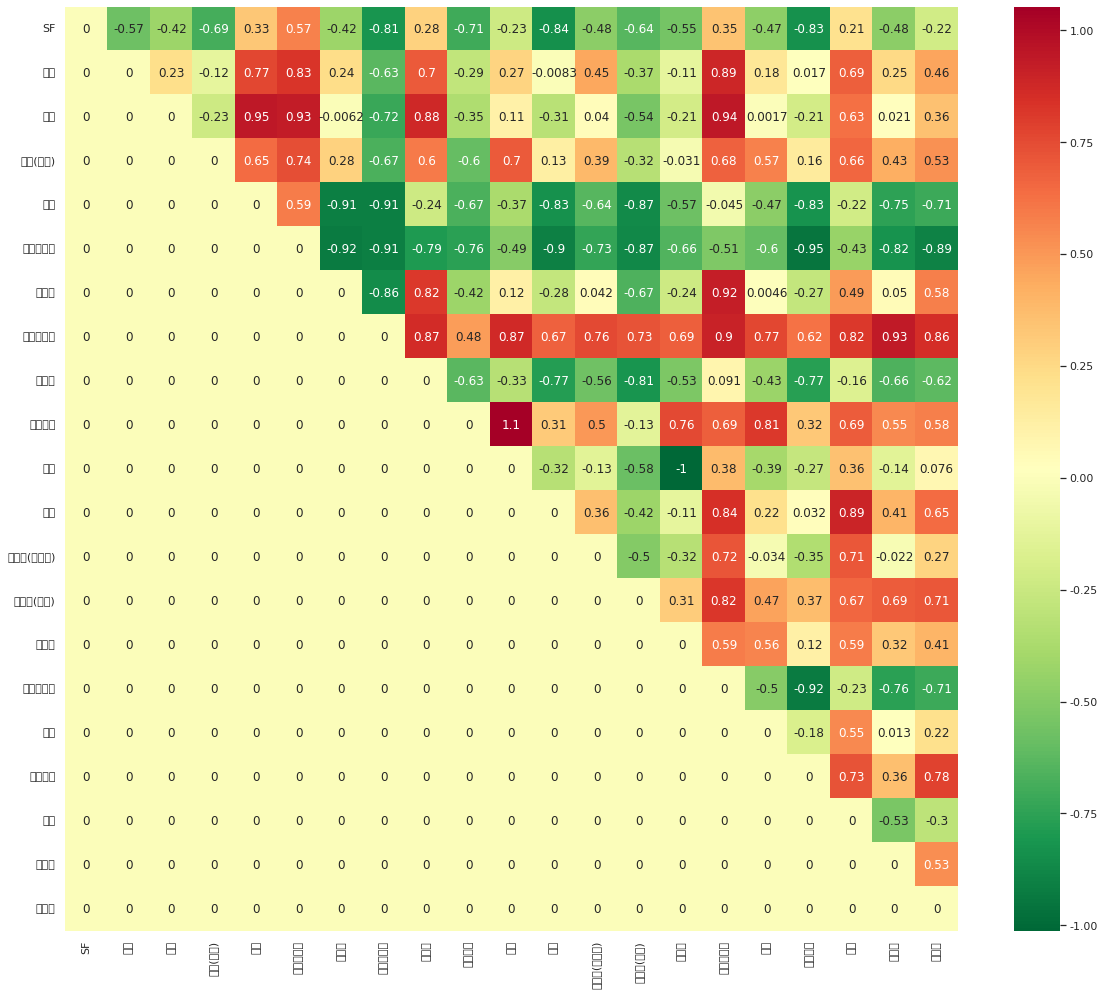

In [44]:
import seaborn as sns;
import matplotlib.pyplot as plt

np.random.seed(0)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 17]

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

한글이 깨지지만 대충 어느 부분이 1에 가까운지는 볼 수 있다.

## 4. WEAT 점수 해석  
WEAT score는 예술영화와 일반영화, A 장르와 B 장르가 있을 때, 점수의 절댓값이 1점에 가까울 수록 A는 예술영화, B는 일반영화와 가깝다고 볼 수 있다.  
다만, 점수가 음수일 경우 그 직관이 사람이 느끼는 편향과는 반대이다.  
몇가지를 예로 들면,  
- 다큐멘터리 사극 -0.90395707  
- 공연 다큐멘터리 0.9305198  
- 사극 전쟁 0.8941746  

첫번째 예에서 점수가 1점에 가깝기 때문에, 다큐멘터리는 예술영화, 사극은 일반영화와 가깝지만 사람의 편향과는 반대라는 것이다.  
두번째는 공연이 예술영화, 다큐멘터리가 일반영화에 가깝고, 세번째는 사극이 예술영화, 전쟁이 일반영화와 가깝다고 나타내고 있다.  

## 5. 회고
1. score를 해석할 때 사극이 더 예술영화일 것 같다고 생각했는데 내가 생각한 것과 다르게 점수가 높게 나왔고 부호가 마이너스인 것을 보니 신기했다. 
2. 히트맵 한글이 안나와서 다른 글꼴들을 다 넣어봤는데도 결과가 여전했다. 뭐가 문제인지 잘 모르겠다.